In [1]:
#@title Preparing the data
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import math

# Importing the dataset
df = pd.read_csv('Data.csv') # Advertisement Clickthrough Rate data

### Upper Confidence Bound (UCB) algorithm
**Step 1:** At each round *n*, we consider two numbers for each ad *i*:
* $N_i(n)$ - the number of time the ad *i* was selected up to round *n*,
* $R_i(n)$ - the sum of rewards of the ad *i* up to round *n*.

**Step 2:** From these two numbers we compute:
* the average reward of ad *i* up to round *n*:
$$\bar{r}_i(n) = \frac{R_i(n)}{N_i(n)}$$
* the confidence interval $[\bar{r}_i(n) - \Delta_i(n),\space \bar{r}_i(n) + \Delta_i(n)]$ at round *n* with
$$\Delta_i(n) = \sqrt{\frac{3*log(n)}{2*N_i(n)}}$$

**Step 3:** We select the ad *i* that has the maximum UCB as $\bar{r}_i(n) + \Delta_i(n)$

In [2]:
#@title The Algorithm
class UCB(object):
  def __init__(self, dataframe):
    ### Step 1
    self.df = dataframe
    self.N = self.df.shape[0] # Number of users
    self.d = self.df.shape[1] # Number of ads
    self.ads_selected = list()
    self.numbers_of_selections = [0] * self.d
    self.sums_of_rewards = [0] * self.d
    self.total_reward = 0
  
  def get_average_reward(self, index):
    self.average_reward = self.sums_of_rewards[index] / self.numbers_of_selections[index]
    return self.average_reward
  
  def get_delta(self, index, number):
    self.delta_i = math.sqrt(3/2 * math.log(number + 1) / self.numbers_of_selections[index])
    return self.delta_i
  
  def run(self):
    assert len(self.ads_selected) == 0, 'Algorithm has already been run!'
    ### Step 2
    for n in range(0, self.N):
      ad, max_upper_bound = 0, 0

      for i in range(0, self.d):
        if self.numbers_of_selections[i] > 0:
          average_reward = self.get_average_reward(i)
          delta_i = self.get_delta(i, n)
          upper_bound = average_reward + delta_i
        else:
          upper_bound = 1e400
    
    ### Step 3
        if upper_bound > max_upper_bound:
          max_upper_bound = upper_bound
          ad = i
      
      # Update the variables
      self.ads_selected.append(ad)
      self.numbers_of_selections[ad] = self.numbers_of_selections[ad] + 1
      # Find the reward and update the variables
      reward = self.df.iloc[n, ad]
      self.sums_of_rewards[ad] = self.sums_of_rewards[ad] + reward
      self.total_reward = self.total_reward + reward

  def visualize(self):
    assert len(self.ads_selected) > 0, 'First run the UCB algorithm!'
    plt.hist(self.ads_selected, ec = 'black')
    plt.xticks(range(0, self.d))
    plt.title('Histogram of ads selections', size = 18)
    plt.xlabel('Ads', size = 14)
    plt.ylabel('# of times ad was selected', size = 14) 



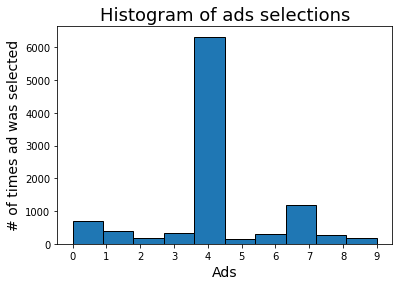

In [3]:
#@title Visualizing the UCB results
model = UCB(df)
model.run()
model.visualize()